In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/sales.csv')

In [3]:
df.dropna(subset=['price'], inplace=True)

In [4]:
df.head()

,cost,price,weight,purchase_date,product_type,product_level,maker,ingredient,height,width,depth
0,$333k,"$300,492",3 Ton 90 Kg,Dec 19 2008,"Q,B",advanced,M14122,"IN732052,IN732053",2.76 meters,97 cm,26 cm
1,NaN,"$430,570",3 Ton 30 Kg,Sep 10 1997,"J,D",basic,NaN,"IN732054,IN732055,IN732056,IN732057,IN732058",2.67 meters,98 cm,26 cm
2,$270k,"$213,070",3 Ton 40 Kg,Sep 05 2001,"J,D",basic,NaN,"IN732054,IN732059,IN732060",3.0 meters,93 cm,24 cm
3,NaN,"$229,174",3 Ton 50 Kg,Dec 23 2016,U,advanced,M14123,"IN732061,IN732062,IN732063",2.5 meters,102 cm,27 cm
4,$97k,"$122,659",2 Ton 970 Kg,Jan 12 2000,"D,R",advanced,NaN,"IN732064,IN732065,IN732066",2.47 meters,101 cm,26 cm


In [5]:
df['year'] = pd.to_datetime(df.purchase_date).dt.year

train_raw = df[df.year < 2015]
test_raw = df[df.year >= 2015]

# 1. Data Transformation

<font color='red'>Assignment:</font> Build a transformer class to extract numerical features (**cost**, **weight**, **height**, **width**, and **depth**) and replace the missing values with the averages in train_raw.

In [6]:
def weight2num(x):
    """
    This function transform weight string to numerical value.
    """
    if type(x) == str: 
        y = x.split(" Ton ")    
        return float(y[0]) * 1000 + float(y[1].replace(' Kg',''))
    else:
        return x

In [9]:
class Numerical_Transformer(object):
    def fit(self, X, y=None):
        self.mean = {}
        df = pd.DataFrame()        
        df['cost'] = X['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
        self.mean['cost'] = df['cost'].mean()
        df['weight'] = X['weight'].map(weight2num)
        self.mean['weight'] = df['weight'].mean()
        df['height'] = X['height'].map(lambda x: x if type(x) == float else float(x.replace('meters', '')))
        self.mean['height'] = df['height'].mean()
        df['width'] = X['width'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
        self.mean['width'] = df['width'].mean()
        df['depth'] = X['depth'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
        self.mean['depth'] = df['depth'].mean()
        
    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['cost'] = X['cost'].map(lambda x: x if type(x) == float else float(x.strip('$').strip('k'))*1000)
        df['weight'] = X['weight'].map(weight2num)
        df['height'] = X['height'].map(lambda x: x if type(x) == float else float(x.replace('meters', '')))
        df['width'] = X['width'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
        df['depth'] = X['depth'].map(lambda x: x if type(x) == float else float(x.replace('cm', '')))
        return df.fillna(self.mean)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

<font color='red'>Assignment:</font> Wrap up the numerical transformer and MinMaxScaler as a pipeline for data transformation.  
**Note:** we don't need linear regression at this time.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
steps = [('ntf', Numerical_Transformer()),
         ('rescale', MinMaxScaler())]
model = Pipeline(steps)

<font color='red'>Assignment:</font> Transform **train_raw** and assign the output to a variable **X_train**.

In [39]:
"""
my_NT = Numerical_Transformer()
X_train = my_NT.fit_transform(train_raw)
my_MMS = MinMaxScaler()
my_MMS.fit(X_train)
X_train = my_MMS.transform(X_train)
"""
X_train = model.fit_transform(train_raw)

In [40]:
X_train

array([[0.35031847, 0.30872483, 0.58888889, 0.30434783, 0.33333333],
       [0.17323162, 0.26845638, 0.53888889, 0.32608696, 0.33333333],
       [0.28343949, 0.27516779, 0.72222222, 0.2173913 , 0.16666667],
       ...,
       [0.17323162, 0.13422819, 0.25      , 0.5       , 0.5       ],
       [0.04352442, 0.2147651 , 0.45555556, 0.36956522, 0.33333333],
       [0.13269639, 0.23489933, 0.7       , 0.19565217, 0.16666667]])

**Example:** import PCA from sklearn.

In [20]:
from sklearn.decomposition import PCA

<font color='red'>Question:</font> What is PCA?

In [17]:
# PCA is a statistical method to reduce the dimension of a dataset, by linearly transforming the data into a new coordinate 
# system where most of the variation in the data could be described with fewer dimensions than the origin data.

<font color='red'>Assignment:</font> Transform **X_train** using **PCA**. Assign the output to a variable **X_train_pca**.

In [41]:
pca = PCA(n_components=5)
pca.fit(X_train)
print(pca.explained_variance_ratio_)

[0.58770344 0.26613977 0.13939442 0.00547071 0.00129166]


# 2. Variance

<font color='red'>Assignment:</font> Plot **explained_variance_ratio_** in a bar chart.

<BarContainer object of 5 artists>

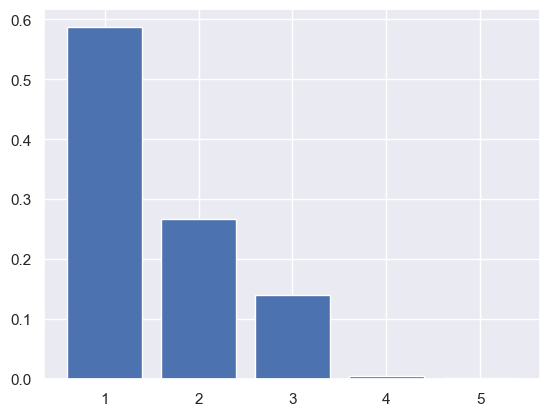

In [57]:
import matplotlib.pylab as plt
%matplotlib inline

plt.bar(range(1,6), pca.explained_variance_ratio_)


<font color='red'>Question:</font> How principal components are ranked?

In [ ]:
# They are sorted descendly based on the explained variance ratio

<font color='red'>Question:</font> What percentage of variance is kept in the first principle component?

In [ ]:
# about 59%

<font color='red'>Question:</font> How do the original features contribute to the first principle component?

In [64]:
pca.components_[0]

array([ 0.03103135,  0.11394729, -0.62950274,  0.53731627,  0.54869901])

In [ ]:
# The first PC is mainly contributed by height, width and depth

<font color='red'>Question:</font> What is the relationship between the principal components and original features? Is PCA a linear function?

In [ ]:
#The pricipal components were linearly transformed from the original features by a transformation matrix defined by the 
# pca.components. PCA is linear

<font color='red'>Assignment:</font> Plot the Variance versus the number of chosen principle components.

<BarContainer object of 5 artists>

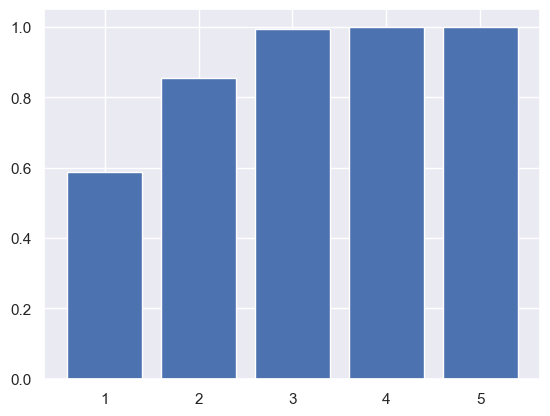

In [66]:
cum_var = pca.explained_variance_ratio_.cumsum()
plt.bar(range(1,6), cum_var)

<font color='red'>Question:</font> How many principle components would you like to keep?

In [ ]:
# 3 since the first 3 PCs account for >99% of the variance

# 3. PCA Pipeline

<font color='red'>Assignment:</font> Build a pipeline to wrap up **Numerical Transformer**, **MinMaxScaler**, **PCA**, and **LinearRegression** to predict **price**. Find the best **n_components** for **PCA**.

In [69]:
y_train = train_raw["price"].map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))
y_test = test_raw["price"].map(lambda x: x if type(x) == float else float(x.strip('$').replace(',', '')))

In [76]:
from sklearn.model_selection import RepeatedKFold,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import numpy as np

steps = [('ntf', Numerical_Transformer()),
         ('rescale', MinMaxScaler()),
         ('pca', PCA()),
         ('lr', LinearRegression())]
model = Pipeline(steps)

scorer_method = make_scorer(mean_squared_error)

#kf = KFold(n_splits=5, shuffle=True, random_state=2023)
kf = KFold(n_splits=5)

pca_n_components = range(1, 6)
grid = dict()
grid['pca__n_components'] = pca_n_components

search = GridSearchCV(model, param_grid = grid, scoring = scorer_method, \
                      cv = kf, n_jobs = -1, error_score = np.NaN).fit(train_raw, y_train)

print('MAE: %.5f' % search.best_score_)
print('Config: %s' % search.best_params_)

MAE: 42701837457.36995
Config: {'pca__n_components': 1}


<font color='red'>Question:</font> What is the difference between PCA and SVD?

In [ ]:
# SVD (sigular value decomposition) is a matrix decomposition method. It decomposes the matrix into uncorrelated indepedent 
# components. PCA is also a method to de-correlate the data but it skips the less important components.